# 01a01a Small Random Directed Graphs
> Random graphs for random test cases

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
from FlowNet.datasets import visualize_graph, visualize_heatmap
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Small Random Toy Directed Graphs

In this notebook, we will create several small and random toy directed graphs and visualize them directly. We will test any embedding and visualization methods on these datasets to check if the embeddings/visualization matches our intuition about the flow on the small directed graphs.

In [ ]:
# export
import warnings
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_sparse import SparseTensor
from torch_geometric.utils import remove_self_loops


class SmallRandom(InMemoryDataset):
    def __init__(self, num_nodes=5, prob_edge=0.2, transform=None, pre_transform=None):
        super().__init__(".", transform, pre_transform)

        if num_nodes > 300:
            num_nodes = 300
            warnings.warn(
                f"Number of nodes is too large for SmallRandom dataset. Reset num_nodes =  {num_nodes}"
            )

        dense_adj = (torch.rand((num_nodes, num_nodes)) < prob_edge).int()
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        if self.pre_transform is not None:
            data = self.pre_transform(data)
        self.data, self.slices = self.collate([data])

Let try creating one such graph

In [ ]:
from FlowNet.datasets import SmallRandom
dataset = SmallRandom(num_nodes=10, prob_edge=0.3, )
data = dataset[0] # there is only graph in this dataset

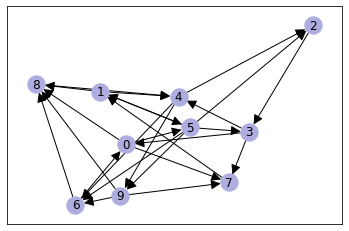

In [ ]:
visualize_graph(data)

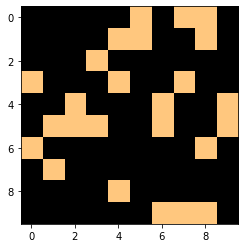

In [ ]:
visualize_heatmap(data.edge_index)

It is also possible to create source and sink nodes using the same `SourceSink` transformation to generate small directed graph with specific characteristic. We will try transforming the graph above into a big cluster of source and a smaller cluster of sinks

In [ ]:
from FlowNet.datasets import SmallRandom, SourceSink
pre_transform = SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0]

ImportError: cannot import name 'SourceSink' from 'FlowNet.datasets' (/Users/adjourner/Projects/FlowNet/FlowNet/datasets.py)